# **1. Generating the Data**

**Problem 1:**

In [1]:
import torch

In [2]:
def generate_data(N):

  # creating a matrix X with N rows and 101 columns
  X = torch.zeros(N, 101)

  # setting x0th component of each row to 1
  X[:, 0] = 1

  # setting x1th to x50th component of each row to random values, with distribution N(0, 1)
  X[:, 1:51] = torch.randn(N, 50)

  # generate data for component indices x51th to x60th
  for i in range(51, 61):
    X[:, i] = X[:, 1] + (0.5 * X[:, i-50]) + (torch.randn(N) * 0.1)

  # generate data for components indices 61 to 70
  for i in range(61, 71):
    X[:, i] = X[:, i-60] - X[:, i-50] + X[:, i-40] + (torch.randn(N) * 0.1)

  # generate data for components indices 71 to 80
  for i in range(71, 81):
    X[:, i] = X[:, 6*(i-70)] + (3 * X[:, i-70]) + (torch.randn(N) * 0.1)

  # generate data for components indices 81 to 90
  for i in range(81, 91):
    X[:, i] = 5 - X[:, i-10]

  # generate data for components indices 91 to 100
  for i in range(91, 101):
    X[:, i] = (0.5 * X[:, 50+((i-90)*4)]) + (0.5 * X[:, 50+((i-90)*3)]) + (torch.randn(N) * 0.1)

  # creating tensor y with N rows and 1 column
  y = torch.zeros(N, 1)
  for i in range(1, 51):
    y += ((-0.88) ** i) * X[:, 2*i].unsqueeze(1)
  y += torch.randn(N, 1) * 0.01

  return X, y

# **2. Fitting a Linear Model**

**Problem 2:**

In [3]:
def linear_predict(w, X):
  # linear model prediction = dot product between X and w
  return torch.matmul(X, w)

In [4]:
def mean_squared_error(y, y_pred):
  squared_diffs = (y - y_pred) ** 2
  mn = torch.mean(squared_diffs)
  return mn

**Problem 3:**

In [9]:
def train_linear_model(X_train, y_train, X_test, y_test, alpha):
    tolerance=0.1
    # Initialize weights randomly
    w = torch.randn(101, requires_grad=True)

    # Lists to store loss values
    training_loss_history = []
    testing_loss_history = []

    # Loop infinitely until early termination condition is met
    while True:
        y_pred = linear_predict(w, X_train)
        loss = mean_squared_error(y_train, y_pred)

        if not torch.isfinite(loss):
            break

        # This command computes the gradient of the loss function with respect to all tensors that have 'requires_grad=True'
        loss.backward()

        with torch.no_grad():
            w -= alpha * w.grad
            w.grad.zero_()

        training_loss_history.append(loss.item())

        with torch.no_grad():
            y_test_pred = linear_predict(w, X_test)
            test_loss = mean_squared_error(y_test, y_test_pred)
            testing_loss_history.append(test_loss.item())

        if len(training_loss_history) > 10:
            # Calculate the average of the last 10 losses for training and testing
            avg_train_loss = sum(training_loss_history[-10:]) / 10
            avg_test_loss = sum(testing_loss_history[-10:]) / 10

            # Check if the loss has changed beyond the tolerance in the last 10 epochs
            if abs(training_loss_history[-1] - avg_train_loss) < tolerance and abs(testing_loss_history[-1] - avg_test_loss) < tolerance:
                break

    return w, training_loss_history, testing_loss_history

**Q. What condition should you put to end your training loop?**

**Ans:**

**Condition 1:**

I have implemented Early Termination. The idea is to stop training the model when training loss and testing loss is no longer improving.

More details on the implementation:
The average of last 10 training loss is taken and is subtracted with the current training loss. Then we take the absolute value of the result and compare it with the tolarance factor. Tolarance factor is a upper bound value that helps us decide if we should consider breaking the training loop or not. We will consider the same logic for testing loss as well. If the absolute value for both losses is less than the tolarence factor then we break the training loop. In other words, the loss is not improving anymore.

The following code condition checks if the loss has changed beyond the tolerance in the last 10 epochs:

if abs(training_loss_history[-1] - avg_train_loss) < tolerance and abs(testing_loss_history[-1] - avg_test_loss) < tolerance: break

**Condition 2:**

If the training loss is not finite, we break out of the training loop. If the loss is infinite, the alpha value is too large. Large alpha values leads to divergence.

**Problem 4:**

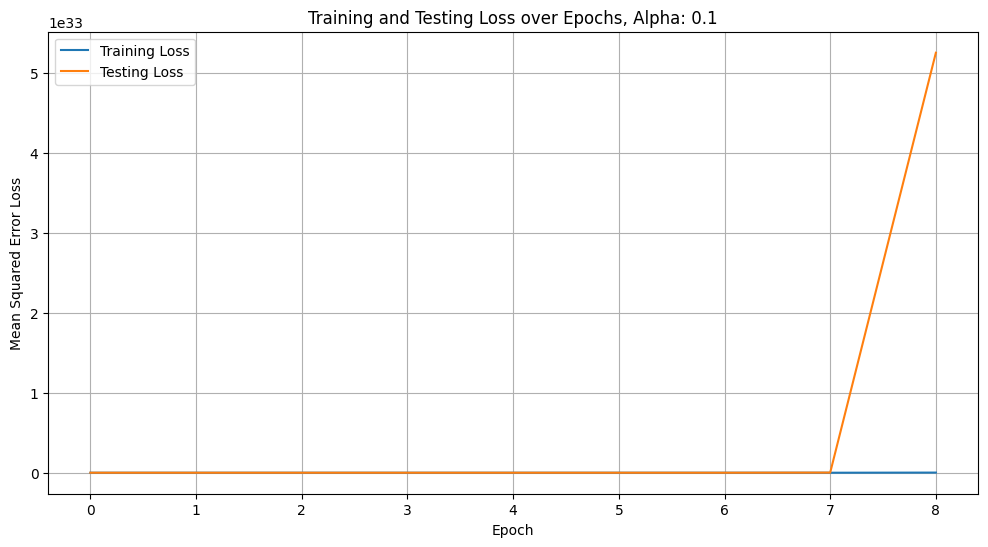

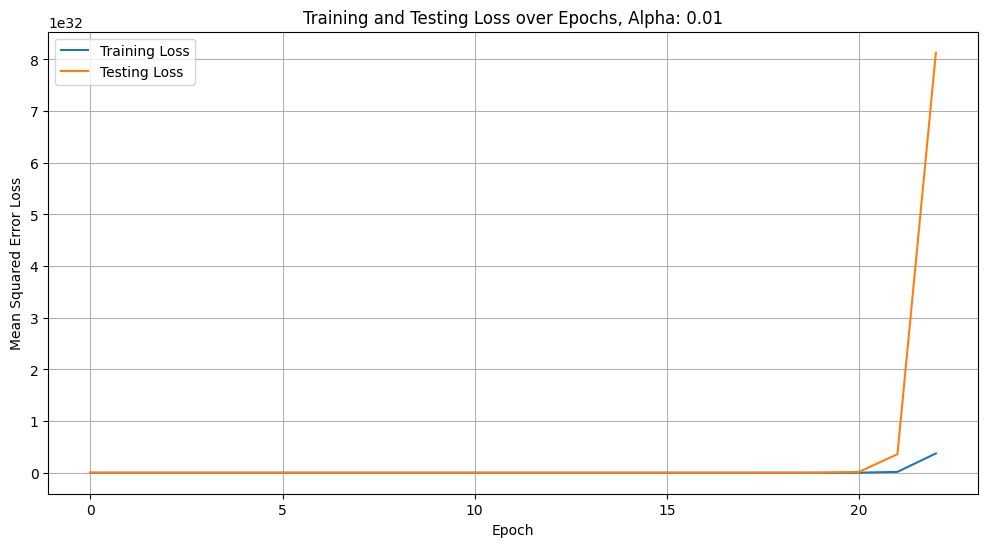

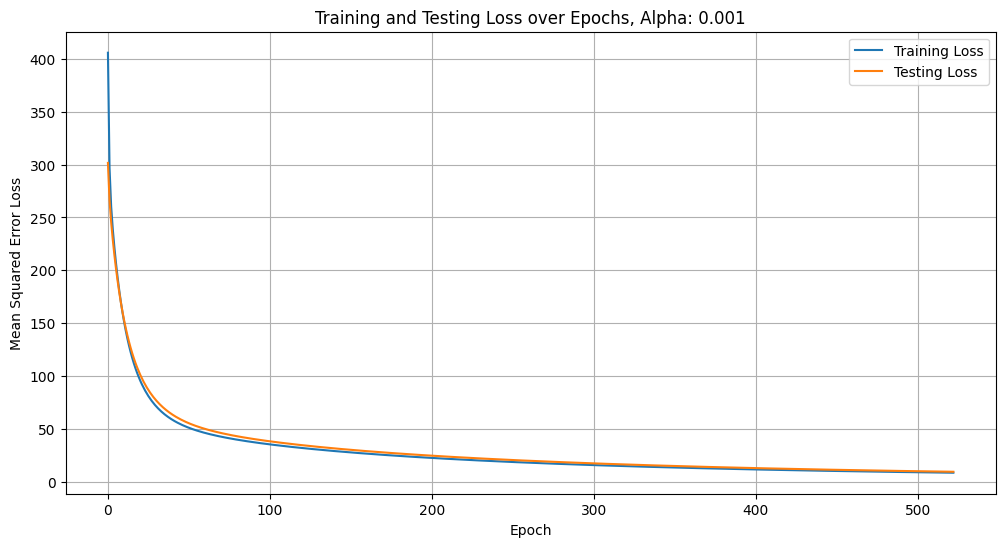

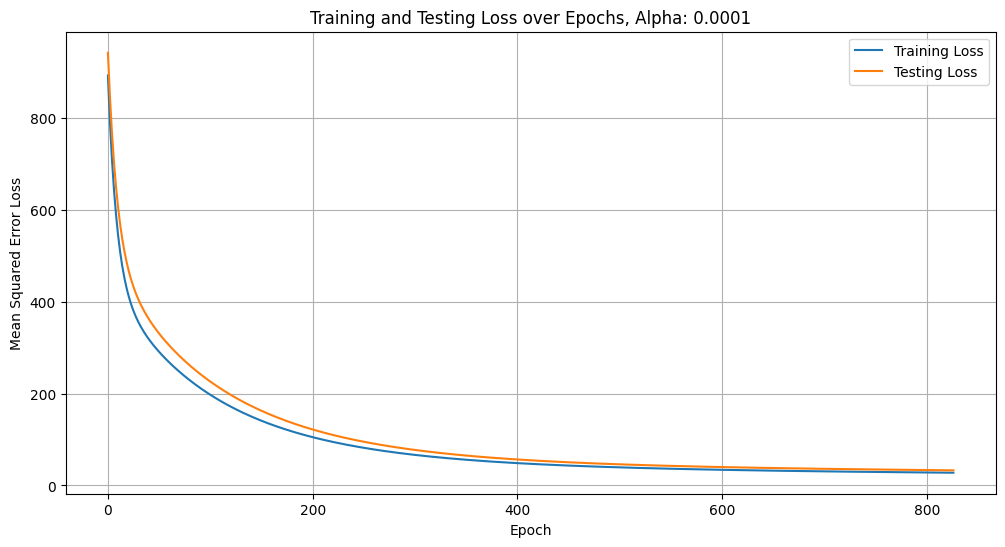

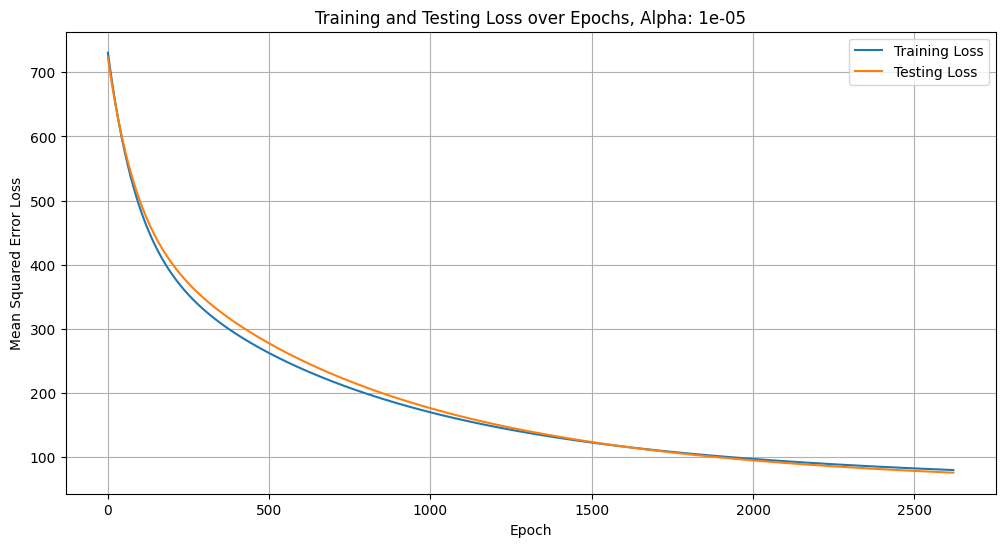

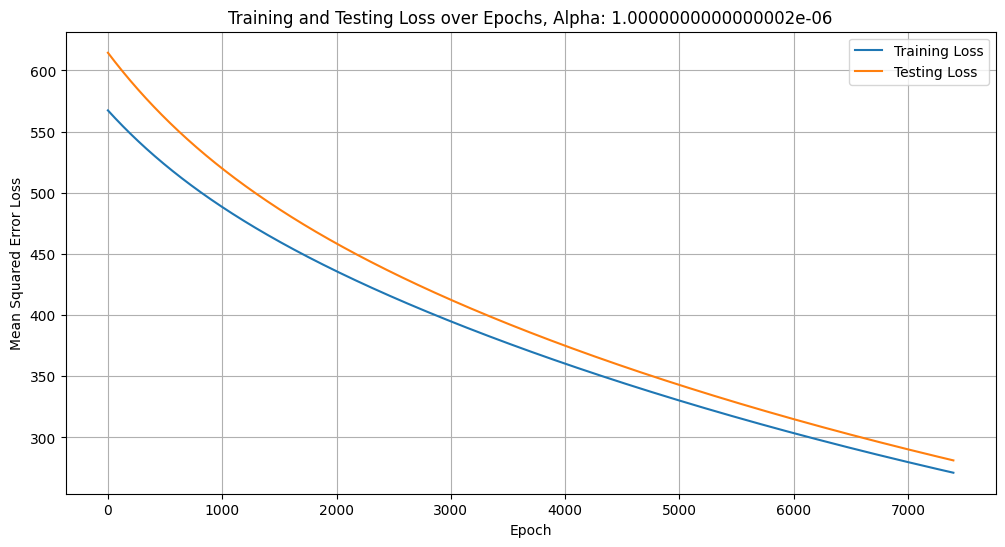

In [10]:
# train the model and plot
# training dataset = 1000, testing dataset = 200

import matplotlib.pyplot as plt

X_train,y_train = generate_data(1000)
X_test,y_test = generate_data(200)

# Testing alphas for convergence; alpha = 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001
alpha = 0.1
for i in range(6):
  w, train_loss_history, test_loss_history = train_linear_model(X_train, y_train, X_test, y_test, alpha)

  plt.figure(figsize=(12, 6))
  plt.plot(train_loss_history, label='Training Loss')
  plt.plot(test_loss_history, label='Testing Loss')
  plt.title('Training and Testing Loss over Epochs, Alpha: ' + str(alpha))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  alpha /= 10

**Q. What range of alpha values did I consider?**

**Ans:**

0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001

**Q. What range of alpha lead to convergence, what don't? How can you tell that an alpha is too large?**

**Ans:**

The alpha values 0.1 and 0.01 led to divergence. The alpha values 0.001, 0.0001, and 0.00001 led to convergence. The graph of alpha value 0.000001 determines that the model is learning too slow.

When we look at the graph for alpha values 0.1 and 0.01, we observe that both the training loss and testing loss increase sharply after few epochs and goes to infinity. With behavior of such type we can conclude that alpha values of 0.1 and 0.01 are too large.

**Q. For an alpha with convergence, plot the loss on the training data and the loss on the testing data as a function of training time. How do the training and testing error compare over time? Is the model learning?**

**Ans:**

Graphs 3, 4, 5, & 6 in the output generated above have alpha values 0.001, 0.0001, 0.00001 & 0.000001 respectively that led to convergence. The training and the testing error tend to decrease over time. Yes, the model is learning.

**Q. For a good alpha, trained to convergence - does the resulting model generalize to the testing data well?**

**Ans:**

Yes. From all the alpha values tested above, the alpha value 0.001 showed convergence first. We can observe that the line for training loss and testing loss in this graph follow very closely with each other. As a result, we can conclude that the resulting model generalize to the testing data well.

**Q. How does the fit model compare to the 'actual' model?**

**Ans:**

We can understand this by simply comparing actual weights and weights generated from the model. Run the code underneath to observe actual weights and weights generated from the model.

In [11]:
X_train,y_train = generate_data(1000)
X_test,y_test = generate_data(200)

alpha = 0.001
model_weights, train_loss_history, test_loss_history = train_linear_model(X_train, y_train, X_test, y_test, alpha)

print("Actual Weights:")
actual_weights = [0] + [(-0.88) ** (i // 2) if i % 2 == 0 else 0 for i in range(1, 101)]
actual_weights_tensor = torch.tensor(actual_weights, dtype=torch.float32)
print(actual_weights_tensor)

print()
print("Weights After Model Trained:")
print(model_weights)

Actual Weights:
tensor([ 0.0000,  0.0000, -0.8800,  0.0000,  0.7744,  0.0000, -0.6815,  0.0000,
         0.5997,  0.0000, -0.5277,  0.0000,  0.4644,  0.0000, -0.4087,  0.0000,
         0.3596,  0.0000, -0.3165,  0.0000,  0.2785,  0.0000, -0.2451,  0.0000,
         0.2157,  0.0000, -0.1898,  0.0000,  0.1670,  0.0000, -0.1470,  0.0000,
         0.1293,  0.0000, -0.1138,  0.0000,  0.1002,  0.0000, -0.0881,  0.0000,
         0.0776,  0.0000, -0.0683,  0.0000,  0.0601,  0.0000, -0.0529,  0.0000,
         0.0465,  0.0000, -0.0409,  0.0000,  0.0360,  0.0000, -0.0317,  0.0000,
         0.0279,  0.0000, -0.0245,  0.0000,  0.0216,  0.0000, -0.0190,  0.0000,
         0.0167,  0.0000, -0.0147,  0.0000,  0.0130,  0.0000, -0.0114,  0.0000,
         0.0100,  0.0000, -0.0088,  0.0000,  0.0078,  0.0000, -0.0068,  0.0000,
         0.0060,  0.0000, -0.0053,  0.0000,  0.0047,  0.0000, -0.0041,  0.0000,
         0.0036,  0.0000, -0.0032,  0.0000,  0.0028,  0.0000, -0.0025,  0.0000,
         0.0022,  0.0000

**Problem 5:**

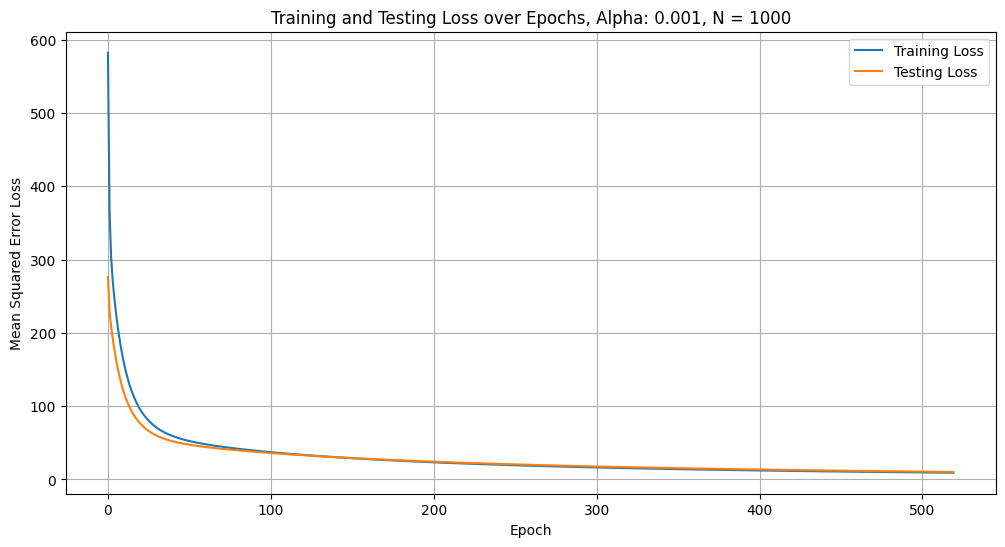

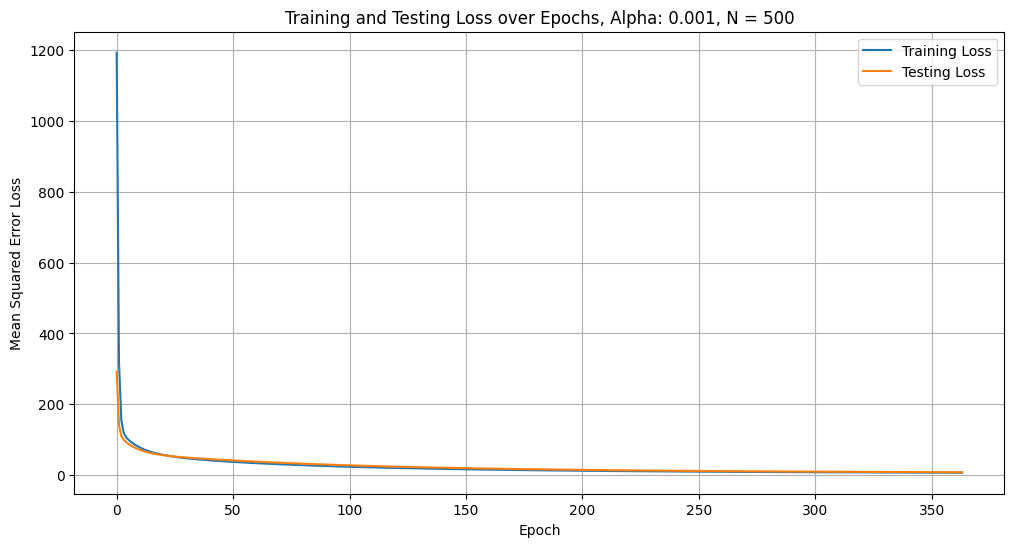

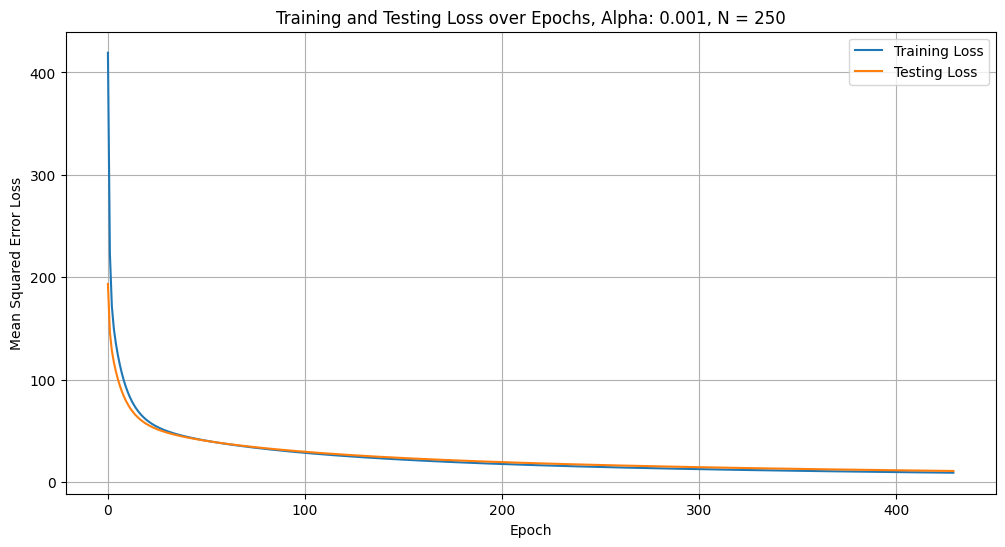

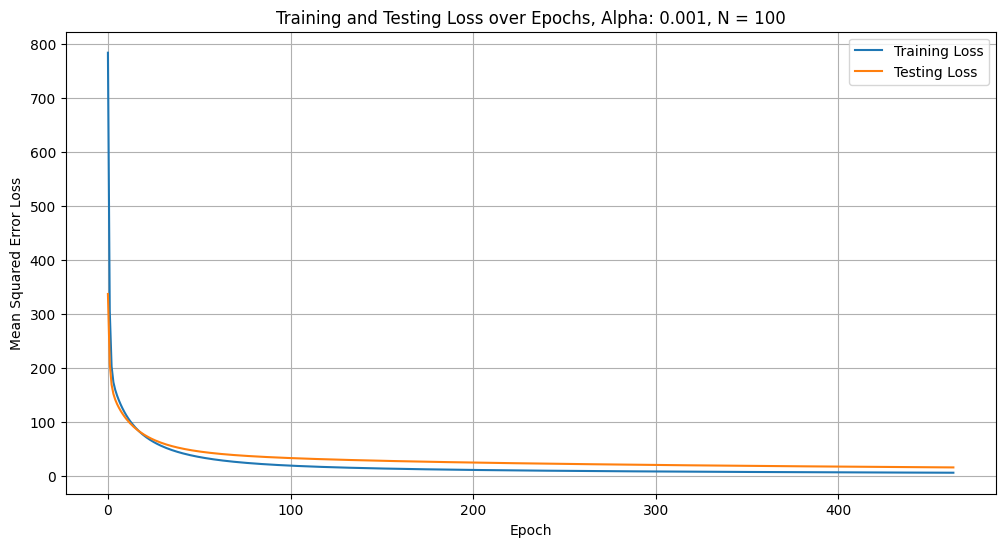

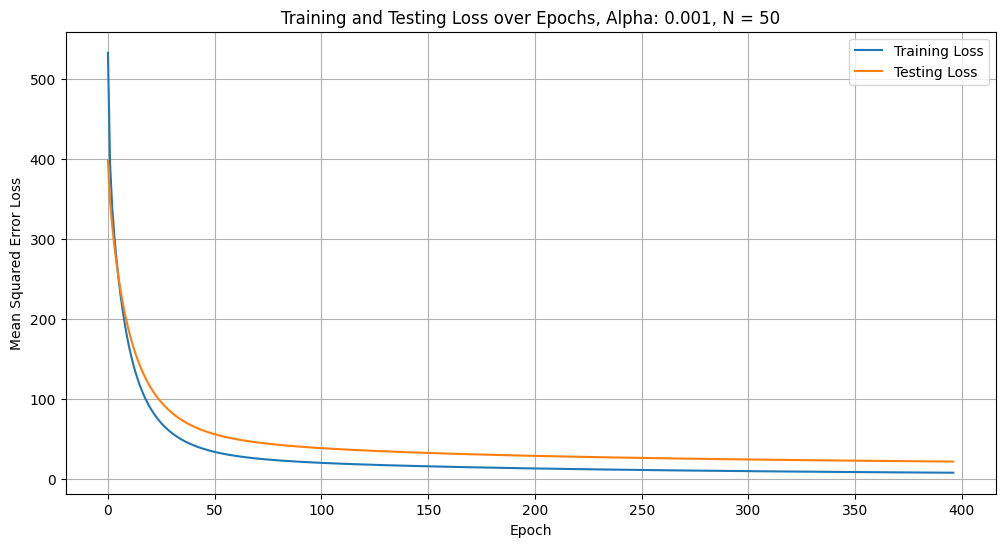

In [24]:
import matplotlib.pyplot as plt

for i in range(5):
  if i == 0:
    x = 1000
  if i == 1:
    x = 500
  if i == 2:
    x = 250
  if i == 3:
    x = 100
  if i == 4:
    x = 50

  X_train,y_train = generate_data(x)
  X_test,y_test = generate_data(200)

  alpha = 0.001
  weights, train_loss_history, test_loss_history = train_linear_model(X_train, y_train, X_test, y_test, alpha)

  plt.figure(figsize=(12, 6))
  plt.plot(train_loss_history, label='Training Loss')
  plt.plot(test_loss_history, label='Testing Loss')
  plt.title('Training and Testing Loss over Epochs, Alpha: ' + str(alpha) + ', N = ' + str(x))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

**Q. Analyze and describe your results.**

**Ans:**

We observe from the graphs that the testing loss increases as the number of data points used for training decreases. Specifically, for N=1000, the loss curves for both training and testing follow very similar trends, decreasing over time and converging to close values. This indicates that the model generalizes well to unseen data when trained with a larger dataset. Conversely, with N=50, there is a noticeable gap between the training and testing loss curves, with the testing loss being higher than the training loss. This suggests that the model does not generalize as effectively when the amount of training data is limited, leading to an increase in testing loss.

# **3. Regularization: Ridge and Lasso**

**Problem 6:**

In [25]:
def ridge_loss(y, y_pred, lambda_, w):
  return mean_squared_error(y_pred, y) + (lambda_ * torch.sum(w[1:] ** 2))

In [26]:
from torch.autograd import Variable

def modified_train_linear_model(X_train, y_train, X_test, y_test, alpha, lambda_):
    w = Variable(torch.randn(X_train.shape[1], 1), requires_grad=True)
    test_loss_history = []
    train_loss_history = []
    tolerance = 0.001 # perfect - 0.001

    while True:
        y_pred = linear_predict(w, X_train)
        loss = ridge_loss(y_train, y_pred, lambda_, w)
        train_loss_history.append(loss.item())

        if not torch.isfinite(loss):
            break

        loss.backward()

        with torch.no_grad():
            w -= alpha * w.grad
            w.grad.zero_()
            y_test_pred = linear_predict(w, X_test)
            # test_loss = mean_squared_error_modified(y_test, y_test_pred)
            test_loss = mean_squared_error(y_test, y_test_pred)
            test_loss_history.append(test_loss.item())

        if len(train_loss_history) > 10:
            # Calculate the average of the last 10 losses for training and testing
            avg_train_loss = sum(train_loss_history[-10:]) / 10
            avg_test_loss = sum(test_loss_history[-10:]) / 10

            # Check if the loss has changed beyond the tolerance in the last 10 epochs
            if abs(train_loss_history[-1] - avg_train_loss) < tolerance and abs(test_loss_history[-1] - avg_test_loss) < tolerance:
                break

    return w, train_loss_history, test_loss_history

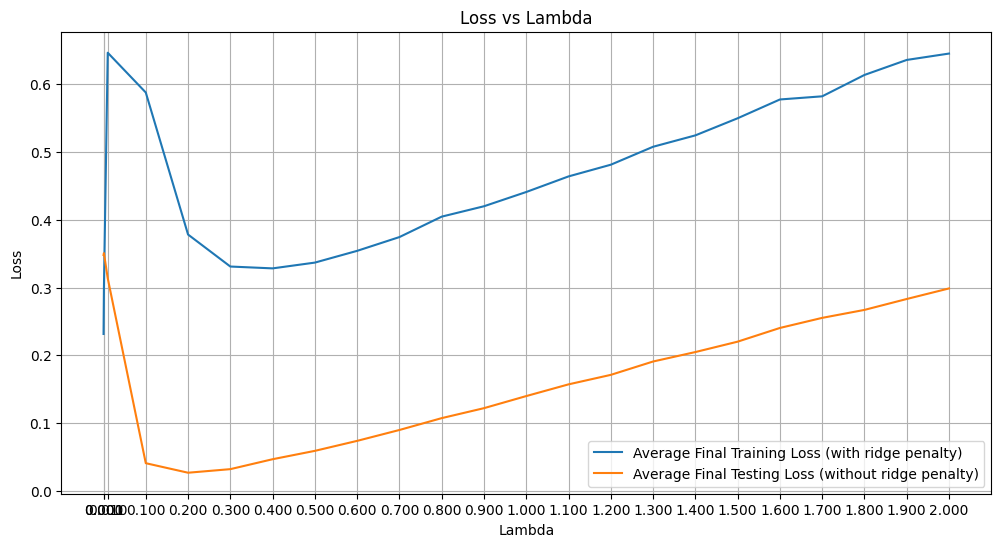

In [27]:
import numpy as np

X, y = generate_data(500)
X_train, y_train = X[:300], y[:300]
X_test, y_test = X[300:], y[300:]

# Training parameters
alpha = 0.001 # perfect - 0.001
lambdas = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]
num_runs = 5  # Number of runs for each lambda

# Lists to hold the averaged final losses
average_final_train_losses = []
average_final_test_losses = []

# Main loop
for lambda_value in lambdas:
    # print(lambda_value)
    temp_train_losses = []
    temp_test_losses = []

    for _ in range(num_runs):
        weights, train_loss_history, test_loss_history = modified_train_linear_model(X_train, y_train, X_test, y_test, alpha, lambda_value)
        temp_train_losses.append(train_loss_history[-1])  # Store the final training loss for this run
        temp_test_losses.append(test_loss_history[-1])    # Store the final testing loss for this run

    # Calculate the average of the final losses over all runs for the current lambda
    average_final_train_losses.append(np.mean(temp_train_losses))
    average_final_test_losses.append(np.mean(temp_test_losses))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lambdas, average_final_train_losses, label='Average Final Training Loss (with ridge penalty)')
plt.plot(lambdas, average_final_test_losses, label='Average Final Testing Loss (without ridge penalty)')
plt.title('Loss vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.xticks(lambdas)
plt.legend()
plt.grid(True)
plt.show()

**Q. Are you able to improve generalization of your model? What range of lambda seems useful?**

**Ans:**

Training loss: As lambda increases, the penalty for large weights also increases, which constaints the model and leads to higher training loss. It penalizes to prevent overfitting.

Testing loss: The testing loss first decreases, bottoms out, and then increases. When the loss is decreasing, the model is generalizing better to unseen data and is not overfitting. When the loss is bottoming out, we find the optimal lambda where the model is neither underfitting nor overfitting and testing loss is minimized. After that when testing loss is increasing, the model starts to underfit data. The excessive penalty on the weights causes the model to become too simple, losing its ability to capture the underlying pattern in the data, which leads to an increase in testing loss.

To conclude, the model generalization is optimal in the range of lambda where the testing loss is lowest. It starts from where the testing loss begins to decrease and ends where it starts to increase again after bottoming out. The range is between 0.0001 and 0.2. The optimal lambda is 0.2, which is at the bottom out of the testing loss as described above.

**Problem 7:**